---

# **Food Classification & Calories Identification**

---

**Classes & Calories**

-The calories per gram for each food item:

- Apple Pie: ~2.5 calories per gram
- Baby Back Ribs: ~3.5 calories per gram
- Baklava: ~5 calories per gram
- Beef Carpaccio: ~2 calories per gram
- Beef Tartare: ~2.5 calories per gram
- Beet Salad: ~0.5 calories per gram
- Beignets: ~3.5 calories per gram
- Bibimbap: ~1.5 calories per gram
- Bread Pudding: ~2.5 calories per gram
- Breakfast Burrito: ~2 calories per gram
- Bruschetta: ~1 calorie per gram
- Caesar Salad: ~0.5 calories per gram
- Cannoli: ~3.5 calories per gram
- Caprese Salad: ~1 calorie per gram
- Carrot Cake: ~3.5 calories per gram
- Ceviche: ~0.5 calories per gram
- Cheese Plate: ~3.5 calories per gram
- Cheesecake: ~3.5 calories per gram
- Chicken Curry: ~1.5 calories per gram
- Chicken Quesadilla: ~2.5 calories per gram
- Chicken Wings: ~3 calories per gram
- Chocolate Cake: ~4 calories per gram
- Chocolate Mousse: ~3 calories per gram
- Churros: ~4 calories per gram
- Clam Chowder: ~1.5 calories per gram
- Club Sandwich: ~2.5 calories per gram
- Crab Cakes: ~2 calories per gram
- Creme Brulee: ~3.5 calories per gram
- Croque Madame: ~3 calories per gram
- Cupcakes: ~3.5 calories per gram
- Deviled Eggs: ~1 calorie per gram
- Donuts: ~4 calories per gram
- Dumplings: ~2.5 calories per gram
- Edamame: ~1 calorie per gram
- Eggs Benedict: ~2.5 calories per gram
- Escargots: ~1 calorie per gram
- Falafel: ~2 calories per gram
- Filet Mignon: ~2.5 calories per gram
- Fish and Chips: ~2.5 calories per gram
- Foie Gras: ~4.5 calories per gram
- French Fries: ~3.5 calories per gram
- French Onion Soup: ~1 calorie per gram
- French Toast: ~2 calories per gram
- Fried Calamari: ~2.5 calories per gram
- Fried Rice: ~1.5 calories per gram
- Frozen Yogurt: ~1 calorie per gram
- Garlic Bread: ~4 calories per gram
- Gnocchi: ~1.5 calories per gram
- Greek Salad: ~0.5 calories per gram
- Grilled Cheese Sandwich: ~3 calories per gram
- Grilled Salmon: ~2 calories per gram
- Guacamole: ~2 calories per gram
- Gyoza: ~2 calories per gram
- Hamburger: ~3.5 calories per gram
- Hot and Sour Soup: ~0.5 calories per gram
- Hot Dog: ~3.5 calories per gram
- Huevos Rancheros: ~2 calories per gram
- Hummus: ~1.5 calories per gram
- Ice Cream: ~2 calories per gram
- Lasagna: ~1.5 calories per gram
- Lobster Bisque: ~1 calorie per gram
- Lobster Roll Sandwich: ~2.5 calories per gram
- Macaroni and Cheese: ~3 calories per gram
- Macarons: ~4 calories per gram
- Miso Soup: ~0.5 calories per gram
- Mussels: ~0.5 calories per gram
- Nachos: ~2.5 calories per gram
- Omelette: ~1.5 calories per gram
- Onion Rings: ~2.5 calories per gram
- Oysters: ~0.5 calories per gram
- Pad Thai: ~2 calories per gram
- Paella: ~1.5 calories per gram
- Pancakes: ~2 calories per gram
- Panna Cotta: ~3.5 calories per gram
- Peking Duck: ~4 calories per gram
- Pho: ~1 calorie per gram
- Pizza: ~2.5 calories per gram
- Pork Chop: ~2.5 calories per gram
- Poutine: ~2.5 calories per gram
- Prime Rib: ~2.5 calories per gram
- Pulled Pork Sandwich: ~2.5 calories per gram
- Ramen: ~1 calorie per gram
- Ravioli: ~1.5 calories per gram
- Red Velvet Cake: ~4 calories per gram
- Risotto: ~1.5 calories per gram
- Samosa: ~2 calories per gram
- Sashimi: ~1 calorie per gram
- Scallops: ~1 calorie per gram
- Seaweed Salad: ~0.5 calories per gram
- Shrimp and Grits: ~2 calories per gram
- Spaghetti Bolognese: ~1.5 calories per gram
- Spaghetti Carbonara: ~2 calories per gram
- Spring Rolls: ~1.5 calories per gram
- Steak: ~2.5 calories per gram
- Strawberry Shortcake: ~3.5 calories per gram
- Sushi: ~1 calorie per gram
- Tacos: ~2 calories per gram
- Takoyaki: ~2.5 calories per gram
- Tiramisu: ~3 calories per gram
- Tuna Tartare: ~1.5 calories per gram
- Waffles: ~2 calories per gram

These values are approximations and can vary based on factors such as ingredients and cooking methods.

---

In [1]:
!pip install keras==2.15.0

In [3]:
import keras
keras.__version__

'2.15.0'

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from keras.src.layers.pooling.average_pooling2d import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [5]:
import os
print(os.listdir("/kaggle/input/food-101/food-101/food-101/images/"))

['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'chu

---

Food Classes

In [6]:
values = ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'churros', 'garlic_bread', 'baklava', 'bruschetta', 'hummus', 'chicken_wings', 'greek_salad', 'tuna_tartare', 'chocolate_cake', 'gyoza', 'eggs_benedict', 'deviled_eggs', 'samosa', 'sushi', 'breakfast_burrito', 'ceviche', 'beef_tartare', 'apple_pie', '.DS_Store', 'huevos_rancheros', 'beignets', 'pizza', 'edamame', 'french_onion_soup', 'hot_dog', 'tacos', 'chicken_quesadilla', 'pho', 'gnocchi', 'pancakes', 'fried_rice', 'cheese_plate', 'onion_rings', 'escargots', 'sashimi', 'pad_thai', 'french_fries']
values.sort()
values = values[1:]
print(values)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [7]:
print("Number of classes:",len(values))

Number of classes: 101


In [9]:
s = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
calories = s.splitlines()
s = "These values are approximations and can vary based on factors such as ingredients and cooking methods."

In [10]:
len(calories)

101

In [11]:
calories[0]

'Apple Pie: ~2.5 calories per gram'

In [13]:
print("First element:",values[0],"\nLast element:",values[-1])

First element: apple_pie 
Last element: waffles


In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_data = train_datagen.flow_from_directory('/kaggle/input/food-101/food-101/food-101/images/',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/kaggle/input/food-101/food-101/food-101/images/',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

Found 90900 images belonging to 101 classes.
Found 10100 images belonging to 101 classes.


In [15]:
print("Images Shape:",train_data.image_shape)

Images Shape: (224, 224, 3)


In [16]:
print('\nBatch Size:',100,
     "\nNunmber of Batches in training set:",len(train_data),
     "\nNunmber of Batches in testing set:",len(test_data),
     "\nNumber of Samples in training set:",train_data.samples,"Samples",
     "\nNumber of Samples in testing set:",test_data.samples,"Samples")


Batch Size: 100 
Nunmber of Batches in training set: 909 
Nunmber of Batches in testing set: 101 
Number of Samples in training set: 90900 Samples 
Number of Samples in testing set: 10100 Samples


In [17]:
print("\nThe 101 Classes numbers:\n",np.unique(train_data.labels),"\n",
       "_"*30,
       "\nThe 101 classes names:\n",train_data.class_indices,
      sep="")


The 101 Classes numbers:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
______________________________
The 101 classes names:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cake

In [18]:
train_data.image_shape

(224, 224, 3)

In [19]:
np.unique(train_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int32)

In [20]:
np.unique(test_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int32)

In [21]:
train_data.class_indices

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

# Model 1 - Dense Net 201 Architecture


In [21]:
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
new_input = Input(shape=(224, 224, 3))
base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=new_input)
# base_model.summary()

74836368/74836368 [==============================] - 0s 0us/step


In [22]:
for layer in base_model.layers[:]:
  layer.trainable = False
# vgg16_model.summary()

In [23]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(101, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten_1 (Flatten)         (None, 94080)             0         
                                                                 
 dense_3 (Dense)             (None, 1000)              94081000  
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 101)               101101    
                                                                 
Total params: 113505085 (432.99 MB)
Trainable params: 95183101 (363.09 MB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


In [22]:
len(test_data)  #N Batches

101

In [24]:
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [25]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
results = model.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/50
909/909 [==============================] - 534s 558ms/step - loss: 3.1558 - accuracy: 0.4091 - val_loss: 1.9879 - val_accuracy: 0.4852
Epoch 2/50
909/909 [==============================] - 500s 550ms/step - loss: 1.6591 - accuracy: 0.5647 - val_loss: 1.9982 - val_accuracy: 0.5041
Epoch 3/50
909/909 [==============================] - 498s 547ms/step - loss: 1.3888 - accuracy: 0.6271 - val_loss: 1.8941 - val_accuracy: 0.5253
Epoch 4/50
909/909 [==============================] - 513s 564ms/step - loss: 1.2229 - accuracy: 0.6641 - val_loss: 1.9996 - val_accuracy: 0.5156
Epoch 5/50
909/909 [==============================] - 528s 580ms/step - loss: 1.0862 - accuracy: 0.6968 - val_loss: 2.2192 - val_accuracy: 0.5180
Epoch 6/50
909/909 [==============================] - 517s 569ms/step - loss: 0.9723 - accuracy: 0.7237 - val_loss: 2.3607 - val_accuracy: 0.5018
Epoch 7/50
909/909 [==============================] - 541s 595ms/step - loss: 0.8696 - accuracy: 0.7506 - val_loss: 2.4201 -

In [32]:
loss , acc = model.evaluate(test_data)

101/101 [==============================] - 48s 467ms/step - loss: 1.8941 - accuracy: 0.5253


In [58]:
print("Test accuracy:", round(acc,4)*100,'%', "\nLoss value:",loss)

Test accuracy: 52.53 % 
Loss value: 1.8941352367401123


In [119]:
results.history['val_accuracy']

[0.48524752259254456,
 0.5040594339370728,
 0.5253465175628662,
 0.5156435370445251,
 0.5180197954177856,
 0.5017821788787842,
 0.5070297122001648,
 0.5116831660270691]

In [120]:
results.history['val_loss']

[1.9879097938537598,
 1.9982013702392578,
 1.8941352367401123,
 1.9995745420455933,
 2.219240665435791,
 2.360720634460449,
 2.420140504837036,
 2.573664665222168]

In [122]:
i = results.history['val_loss'].index(1.8941352367401123)
i

2

In [123]:
results.history['val_accuracy'][i]

0.5253465175628662

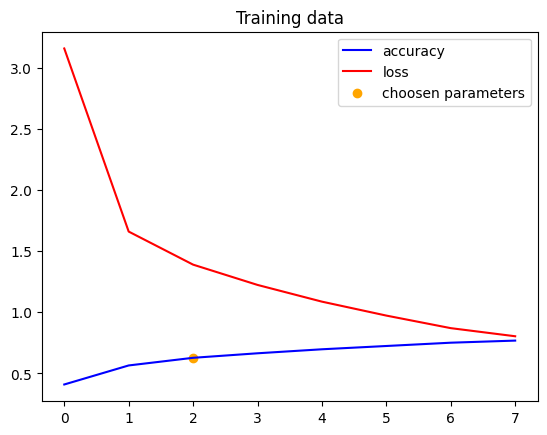

In [124]:
fig = plt.figure()
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.plot(results.history['loss'], c='red', label='loss')
plt.scatter(i,results.history['accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Training data')
plt.legend(loc='upper right')
plt.show()

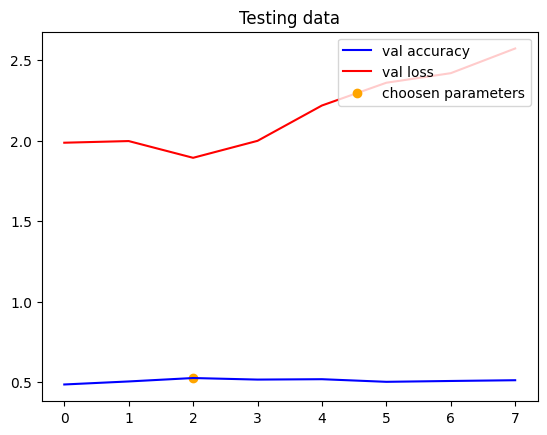

In [125]:
fig = plt.figure()
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.scatter(i,results.history['val_accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Testing data')
plt.legend(loc='upper right')
plt.show()

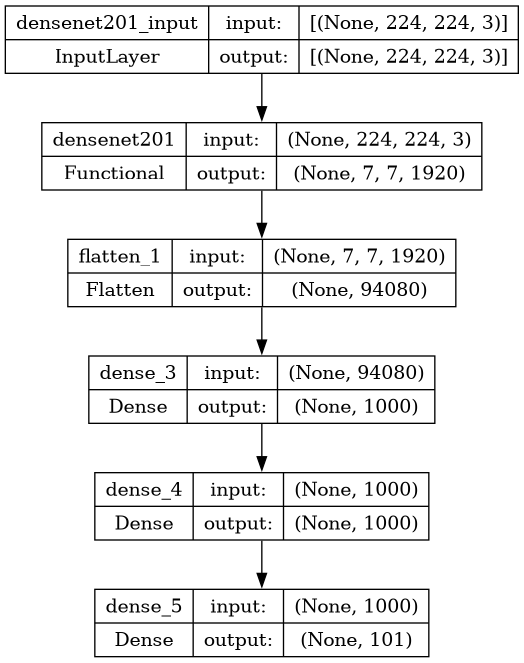

In [126]:
from tensorflow.keras.utils import plot_model
# plot the model
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

# Model 2 - VGG 19 Architecture
(refused)

In [12]:
from tensorflow.keras.applications import VGG19
vgg = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
for layer in vgg.layers:
    layer.trainable = False
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model2 = Sequential()
model2.add(vgg)
model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(4096, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(101, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 101)               413797    
                                                                 
Total params: 139984037 (534.00 MB)
Trainable params: 11

In [15]:
from keras.optimizers import Adam
model2.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
results2 = model2.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/50


I0000 00:00:1709520921.217754     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


909/909 [==============================] - 1072s 1s/step - loss: 3.6515 - accuracy: 0.1717 - val_loss: 3.0616 - val_accuracy: 0.2528
Epoch 2/50
909/909 [==============================] - 581s 639ms/step - loss: 2.8806 - accuracy: 0.2834 - val_loss: 2.9613 - val_accuracy: 0.2715
Epoch 3/50
816/909 [=========================>....] - ETA: 57s - loss: 2.6591 - accuracy: 0.3292


KeyboardInterrupt



---

# Model 3 - Inception V3 Architecture
(Best accuracy)

In [22]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
from keras.optimizers import SGD
from keras.regularizers import l2
import keras.backend as K
import math

In [79]:
base_model3 = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

x = base_model3.output
x = AveragePooling2D()(x)
x = Dropout(.5)(x)
x = Flatten()(x)
x = Dense(101, kernel_initializer='glorot_uniform', kernel_regularizer=l2(.0005), activation='softmax')(x)
model3 = Model(inputs=base_model3.input, outputs=x)
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_1034 (Conv2D)        (None, 111, 111, 32)         864       ['input_15[0][0]']            
                                                                                                  
 batch_normalization_1034 (  (None, 111, 111, 32)         96        ['conv2d_1034[0][0]']         
 BatchNormalization)                                                                              
                                                                                                  
 activation_1034 (Activatio  (None, 111, 111, 32)         0         ['batch_normalization_10

In [80]:
opt = SGD(lr=.1, momentum=.9)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
from keras.models import load_model
model3 = load_model("/kaggle/input/food-101-model/tensorflow2/food-101/1/model_food_101.h5")

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
results3 = model3.fit(train_data, epochs=10, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=2, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/10


2024-03-14 23:31:53.916425: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/dropout_11/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1710459118.259536     186 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


909/909 [==============================] - 1009s 1s/step - loss: 0.0816 - accuracy: 0.9924 - val_loss: 1.6280 - val_accuracy: 0.7065
Epoch 2/10
909/909 [==============================] - 829s 912ms/step - loss: 0.0646 - accuracy: 0.9962 - val_loss: 1.4801 - val_accuracy: 0.7417
Epoch 3/10
909/909 [==============================] - 830s 913ms/step - loss: 0.0562 - accuracy: 0.9970 - val_loss: 1.4059 - val_accuracy: 0.7487
Epoch 4/10
909/909 [==============================] - 829s 911ms/step - loss: 0.0460 - accuracy: 0.9986 - val_loss: 1.3613 - val_accuracy: 0.7535
Epoch 5/10
909/909 [==============================] - 828s 911ms/step - loss: 0.0379 - accuracy: 0.9995 - val_loss: 1.2399 - val_accuracy: 0.7697
Epoch 6/10
909/909 [==============================] - 828s 911ms/step - loss: 0.0325 - accuracy: 0.9997 - val_loss: 1.2145 - val_accuracy: 0.7693
Epoch 7/10
909/909 [==============================] - 828s 911ms/step - loss: 0.0284 - accuracy: 0.9997 - val_loss: 1.1774 - val_accuracy

In [27]:
loss, acc = model3.evaluate(test_data)

101/101 [==============================] - 41s 402ms/step - loss: 1.0886 - accuracy: 0.7736


In [29]:
print("Test Accuracy:",round(acc*100,2),"%","\nTest Loss:",loss)

Test Accuracy: 77.36 % 
Test Loss: 1.0886189937591553


In [30]:
model = model3

Training again

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
results3 = model3.fit(train_data, epochs=10, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=2, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/10
909/909 [==============================] - 829s 912ms/step - loss: 0.0173 - accuracy: 0.9999 - val_loss: 1.0805 - val_accuracy: 0.7749
Epoch 2/10
909/909 [==============================] - 828s 911ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 1.0645 - val_accuracy: 0.7743
Epoch 3/10
909/909 [==============================] - 828s 910ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 1.0611 - val_accuracy: 0.7733


In [32]:
loss, acc = model3.evaluate(test_data)

101/101 [==============================] - 41s 406ms/step - loss: 1.0805 - accuracy: 0.7749


In [36]:
print("Test Accuracy:",round(acc*100,2),"%","\nTest Loss:",round(loss,4))

Test Accuracy: 77.49 % 
Test Loss: 1.0805


In [37]:
results3 = {"accuracy":    [0.9924,0.9962,0.9970,0.9986,0.9995,0.9997,0.9997,0.9999,0.9999,1.0000,0.9999,1.0000,1.0000],
            "loss":        [0.0816,0.0646,0.0562,0.0460,0.0379,0.0325,0.0284,0.0245,0.0216,0.0191,0.0173,0.0158,0.0145],
            "val_accuracy":[0.7065,0.7417,0.7487,0.7535,0.7697,0.7693,0.7716,0.7722,0.7721,0.7736,0.7749,0.7743,0.7733],
            "val_loss":    [1.6280,1.4801,1.4059,1.3613,1.2399,1.2145,1.1774,1.1357,1.1133,1.0886,1.0805,1.0645,1.0611]}

In [38]:
model3.save("model_food_1012.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
results3['val_accuracy']

[0.7065,
 0.7417,
 0.7487,
 0.7535,
 0.7697,
 0.7693,
 0.7716,
 0.7722,
 0.7721,
 0.7736,
 0.7749,
 0.7743,
 0.7733]

In [41]:
results3['val_loss']

[1.628,
 1.4801,
 1.4059,
 1.3613,
 1.2399,
 1.2145,
 1.1774,
 1.1357,
 1.1133,
 1.0886,
 1.0805,
 1.0645,
 1.0611]

In [42]:
i = results3['val_loss'].index(round(loss,4))
i

10

In [43]:
results3['val_accuracy'][i]

0.7749

**Visualize training history**

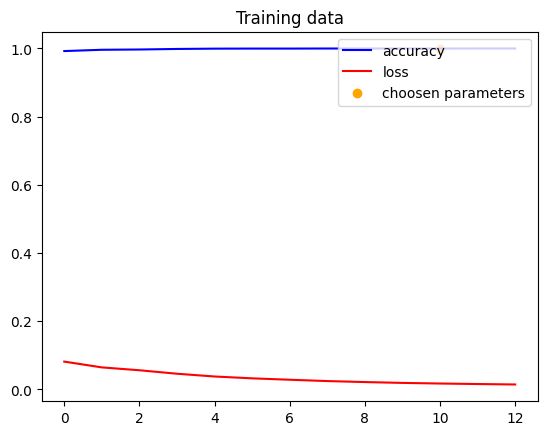

In [44]:
fig = plt.figure()
plt.plot(results3['accuracy'], c='blue', label='accuracy')
plt.plot(results3['loss'], c='red', label='loss')
plt.scatter(i,results3['accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Training data')
plt.legend(loc='upper right')
plt.show()

**Visualize testing history**

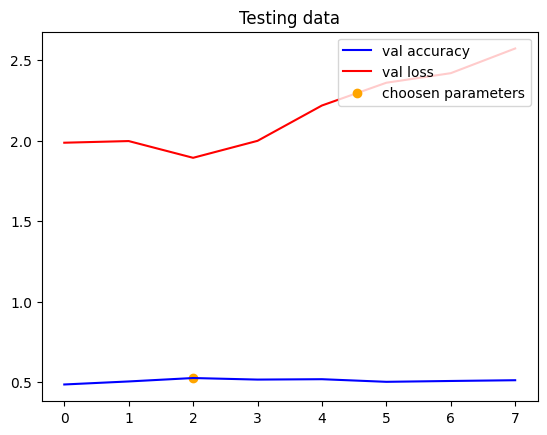

In [42]:
fig = plt.figure()
plt.plot(results3.history['val_accuracy'], c='blue', label='val accuracy')
plt.plot(results3.history['val_loss'], c='red', label='val loss')
plt.scatter(i,results3.history['val_accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Testing data')
plt.legend(loc='upper right')
plt.show()

In [46]:
yp = model3.predict(test_data).argmax(axis=1).reshape(-1,)
yp.shape

101/101 [==============================] - 48s 468ms/step


(10100,)

In [47]:
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
m

Predicted,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Actual,,,,,,,,,,,,,,,,,,,,,
0,56,1,1,0,0,0,0,0,8,1,...,0,0,1,1,0,0,0,1,1,2
1,0,77,0,1,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0
2,3,0,82,0,0,0,0,0,1,0,...,0,2,0,0,1,0,0,0,1,0
3,0,0,0,80,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,72,1,0,0,0,0,...,0,0,1,0,0,1,0,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,76,0,0,1,0
97,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,91,0,0,0
98,0,0,0,1,0,0,0,0,2,0,...,1,0,0,0,0,0,0,78,0,1


Heatmap



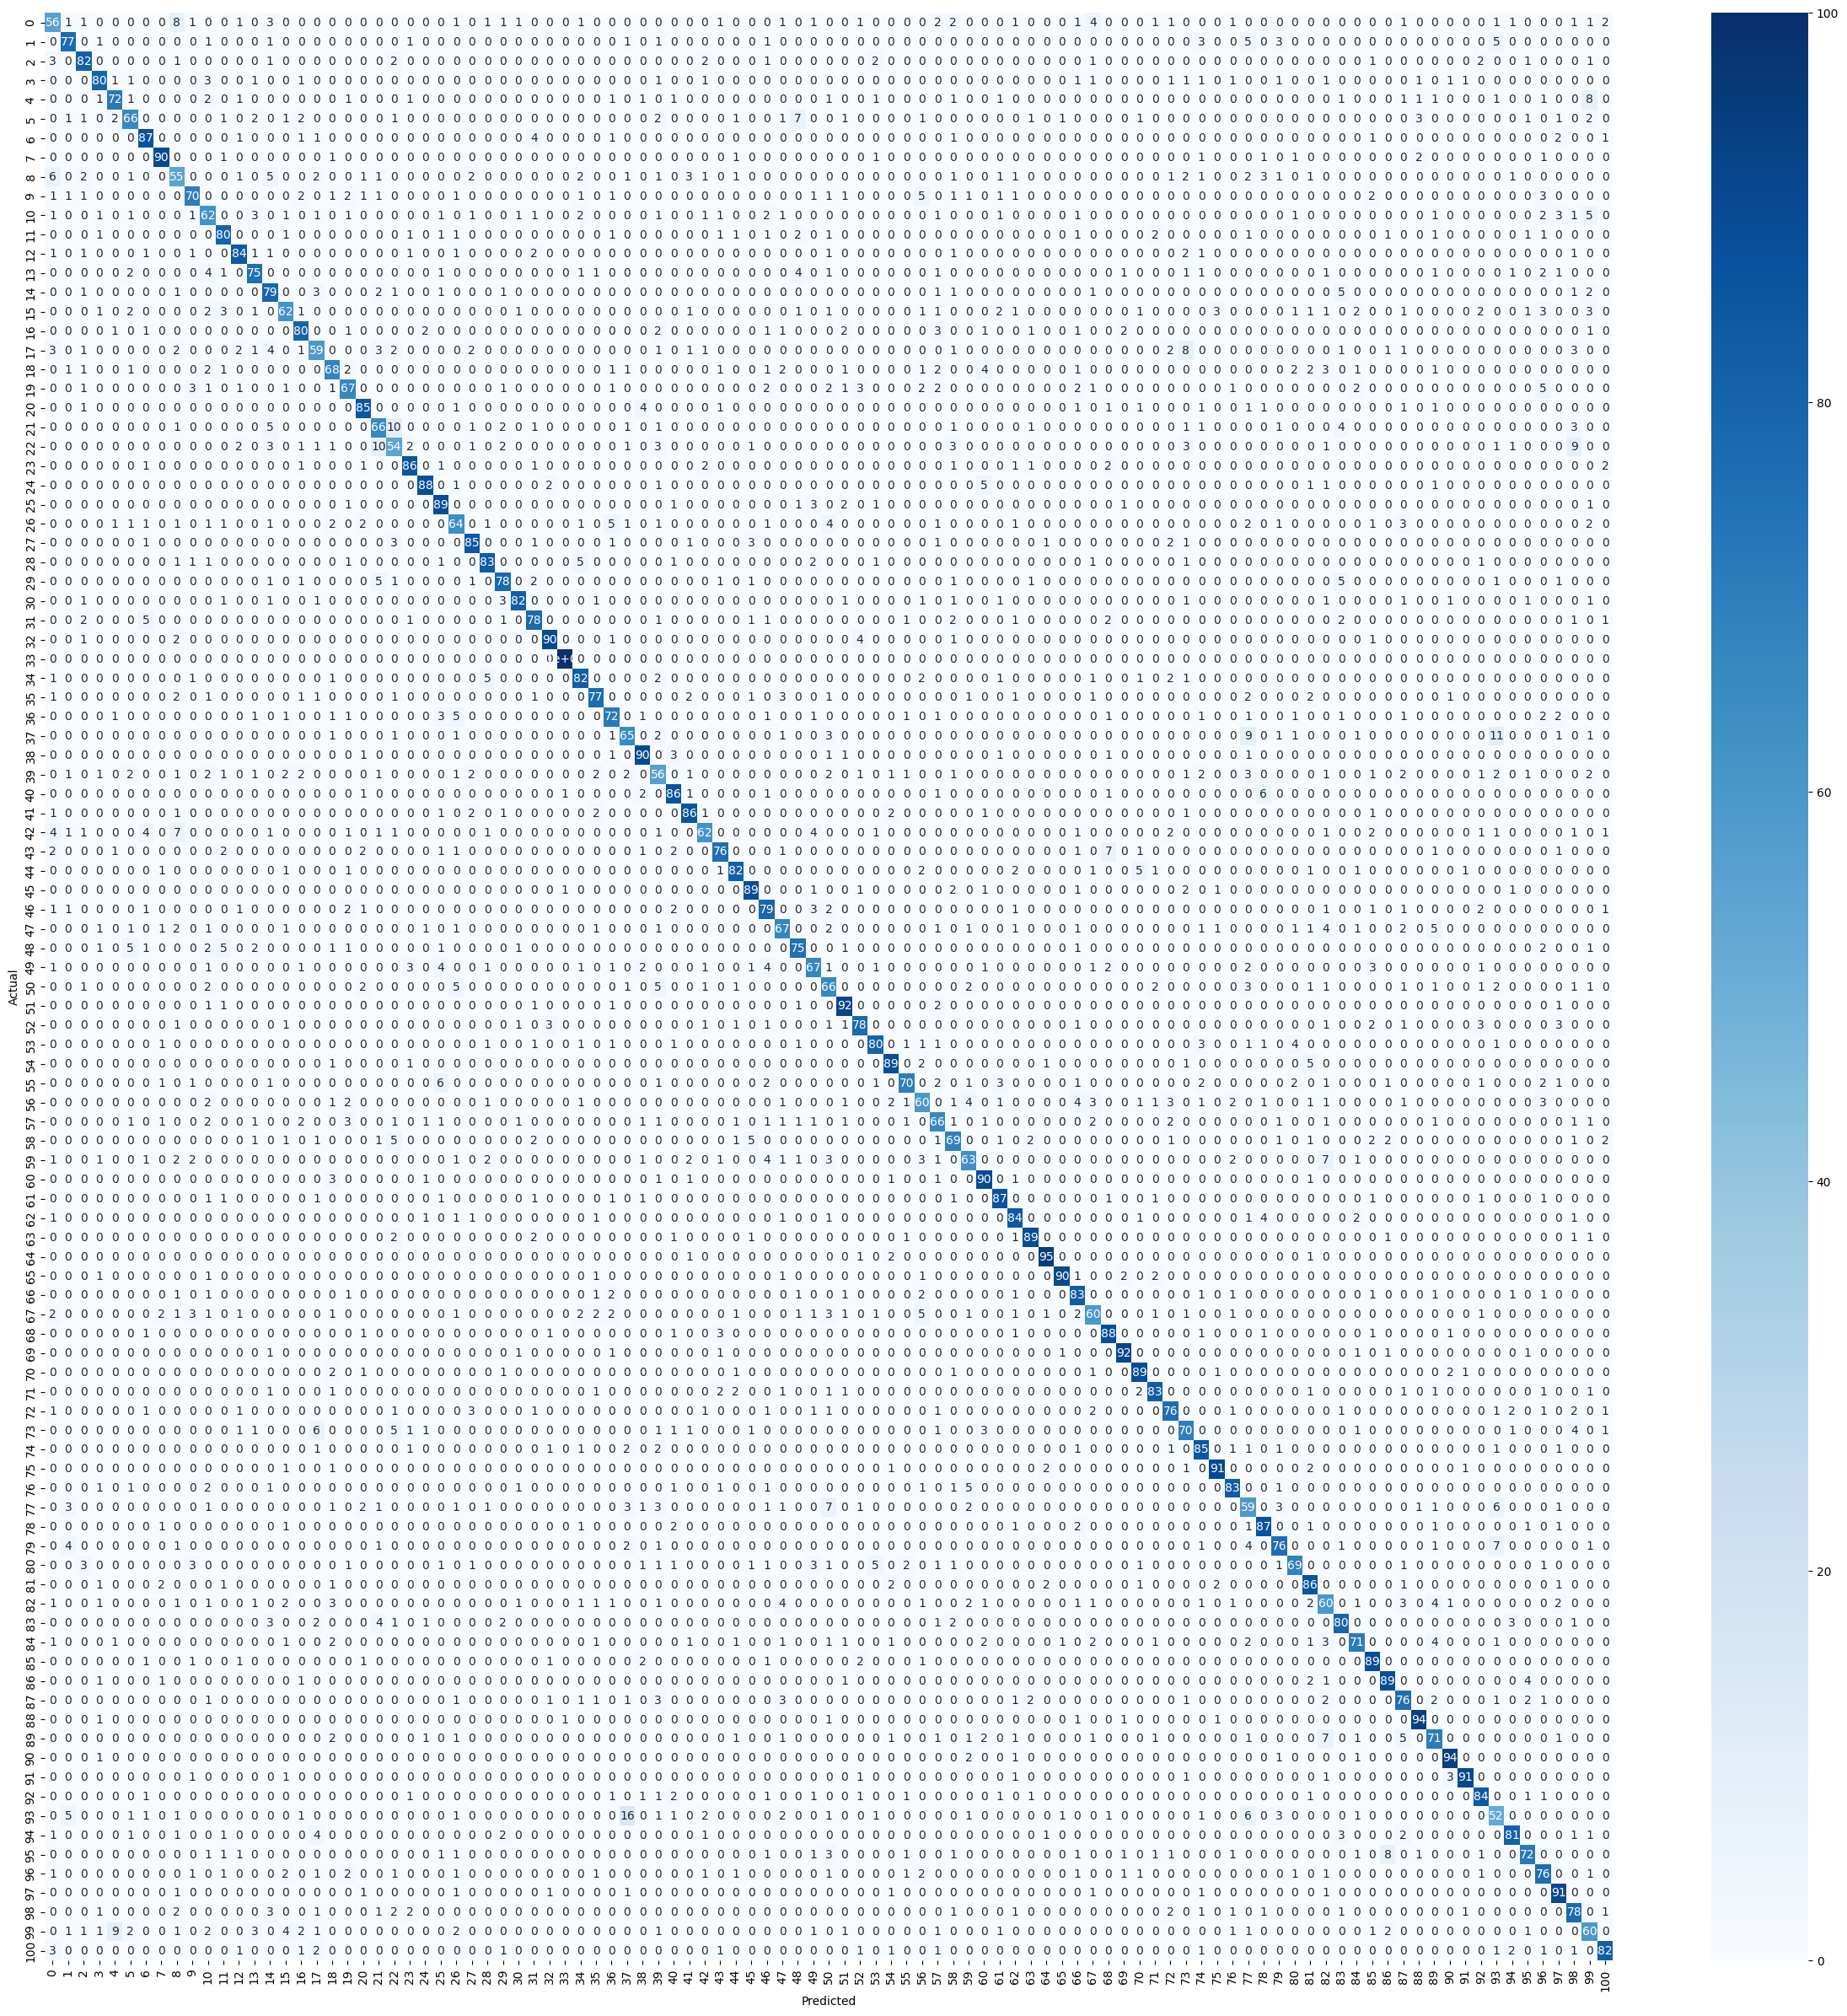

In [48]:
print("Heatmap\n")
plt.figure(figsize=(30, 30))
sn.heatmap(m,annot=True, cmap='Blues')
plt.show()

# Testing some Samples

In [134]:
print(os.listdir("/kaggle/input/food-101/food-101/food-101/images/"))

['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'chu

Macarons Sample


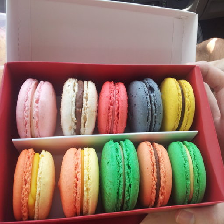

In [49]:
print("Macarons Sample")
macarons = load_img("/kaggle/input/food-101/food-101/food-101/images/macarons/2428554.jpg",target_size=(224,224))
macarons

Pizza Sample


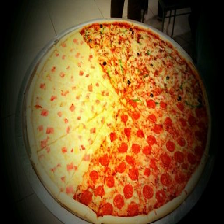

In [50]:
print("Pizza Sample")
pizza = load_img("/kaggle/input/food-101/food-101/food-101/images/pizza/768276.jpg",target_size=(224,224,3))
pizza

Donuts Sample


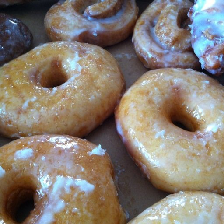

In [51]:
print("Donuts Sample")
donuts = load_img("/kaggle/input/food-101/food-101/food-101/images/donuts/2563686.jpg",target_size=(224,224,3))
donuts

Frensh Toast Sample


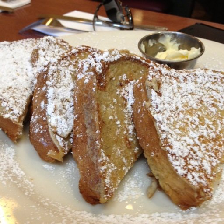

In [52]:
print("Frensh Toast Sample")
toast = load_img("/kaggle/input/food-101/food-101/food-101/images/french_toast/2769309.jpg",target_size=(224,224,3))
toast

French_fries Sample


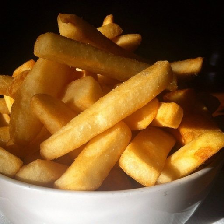

In [53]:
print("French_fries Sample")
fries = load_img("/kaggle/input/food-101/food-101/food-101/images/french_fries/2246621.jpg",target_size=(224,224))
fries

Ice Cream Sample


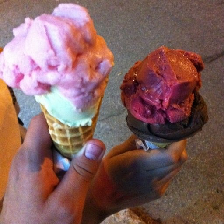

In [54]:
print("Ice Cream Sample")
ice = load_img("/kaggle/input/food-101/food-101/food-101/images/ice_cream/579407.jpg",target_size=(224,224))
ice

Text(0.5, 1.0, 'Donuts')

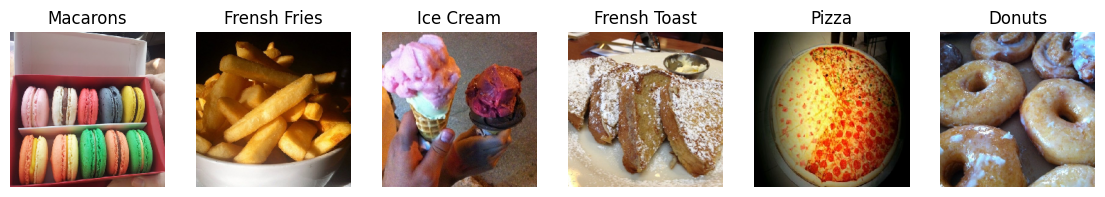

In [55]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 6, 1)
plt.axis('off')
plt.imshow(macarons)
plt.title("Macarons")
# _____________________________________________
fig.add_subplot(1, 6, 2)
plt.axis('off')
plt.imshow(fries)
plt.title("Frensh Fries")
# _____________________________________________
fig.add_subplot(1, 6, 3)
plt.axis('off')
plt.imshow(ice)
plt.title("Ice Cream")
# _____________________________________________
fig.add_subplot(1, 6, 4)
plt.axis('off')
plt.imshow(toast)
plt.title("Frensh Toast")
# _____________________________________________
fig.add_subplot(1, 6, 5)
plt.axis('off')
plt.imshow(pizza)
plt.title("Pizza")
# _____________________________________________
fig.add_subplot(1, 6, 6)
plt.axis('off')
plt.imshow(donuts)
plt.title("Donuts")

In [56]:
macarons = img_to_array(macarons)
fries = img_to_array(fries)
ice = img_to_array(ice)
pizza = img_to_array(pizza)
donuts = img_to_array(donuts)
toast = img_to_array(toast)
macarons = macarons/255
fries = fries/255
ice = ice/255
pizza = pizza/255
donuts = donuts/255
toast = toast/255
macarons = macarons.reshape(1,224,224,3)
fries = fries.reshape(1,224,224,3)
ice = ice.reshape(1,224,224,3)
pizza = pizza.reshape(1,224,224,3)
donuts = donuts.reshape(1,224,224,3)
toast = toast.reshape(1,224,224,3)

macarons.shape

(1, 224, 224, 3)

# Samples Predicting

In [57]:
p1 = (model.predict(macarons)).argmax()

print("Class ",p1,": ",values[p1],sep='')
print(calories[p1],'\nNote:',s)

1/1 [==============================] - 3s 3s/step
Class 63: macarons
Macarons: ~4 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [58]:
p2 = (model.predict(fries)).argmax()

print("Class ",p2,": ",values[p2],sep='')
print(calories[p2],'\nNote:',s)

1/1 [==============================] - 0s 28ms/step
Class 40: french_fries
French Fries: ~3.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [59]:
p3 = (model.predict(ice)).argmax()

print("Class ",p3,": ",values[p3],sep='')
print(calories[p3],'\nNote:',s)

1/1 [==============================] - 0s 24ms/step
Class 58: ice_cream
Ice Cream: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [60]:
p4 = (model.predict(pizza)).argmax()

print("Class ",p4,": ",values[p4],sep='')
print(calories[p4],'\nNote:',s)

1/1 [==============================] - 0s 29ms/step
Class 76: pizza
Pizza: ~2.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [61]:
p5 = (model.predict(donuts)).argmax()

print("Class ",p5,": ",values[p5],sep='')
print(calories[p5],'\nNote:',s)

1/1 [==============================] - 0s 28ms/step
Class 31: donuts
Donuts: ~4 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [62]:
p6 = (model.predict(toast)).argmax()

print("Class ",p6,": ",values[p6],sep='')
print(calories[p6],'\nNote:',s)

1/1 [==============================] - 0s 28ms/step
Class 42: french_toast
French Toast: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


---